#**Best Time To Go To The Gym**

Spring 2024 Data Science Project


**Contribution Checkpoints:**

A: Project idea - 5%
B: Dataset Curation and Preprocessing - 10%
C: Data Exploration and Summary Statistics - 10%
D: ML Algorithm Design/Development - 25%
E: ML Algorithm Training and Test Data Analysis - 20%
F: Visualization, Result Analysis, Conclusion - 15%
G: Final Tutorial Report Creation - 10%
H: Additional (not listed above, if any) - 5%

Member 1: Jonathan Hale, Contribution: 90% (Did not contribute to A)

Member 2: Ana Gupta, Contribution: 90% (Did not contribute to G)

Member 3: Quinton Baleikasavu, Contribution: 90% (Did not contribute to G)



We, **Jonathan Hale**, **Ana Gupta**, and **Quinton Baleikasavu**, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial. May 7 2024

We all collaborated and worked together on this throughout the entirity of the project so this summary relates to all of us: Jonathan Hale, Ana Gupta, and Quinton Baleikasavu.

Throughout the span of the project we all communicated frequently about how we were going to approach the project. We bounced ideas of each other and had all equal parts on the completion of this project. From the brainstorming, checkpoints, and final tutorial, all members played a crucial role and contributed equally.

Jonathan Hale: Jonathan played a large role in determining what models and classifications to use along with the flow of the project. During the beginning of the project, he did not have much of a preference on what project was chosen to focus on but he did work hard with his peers to help use the skils he learned in class to complete coding segments of Checkpoint 2 and 3. He also checked over and tweaked the finishing touches on multiple aspects of the project for instance, correcting errors on previous checkpoints to develop a more fleshed out assignment. Lastly, we played a great role in the desgin aspect of the project, following closely to the style presented to us in previous homework assignments.


Ana Gupta: Ana played a considerable role in determing what she wanted the project to look at. The main focus of the project was proposed by her and she had a clear vision on how and what she wanted the project to focus on. With this, Ana was very adamit about completing segments of the checkpoints and project sections. She played a great part in communicating and helping the group through confusion during developement and adhering to the instructions. Overall a large role in checking over code and text segments and overall flow of the project.


Quinton Baleikasavu: Quinton played a significant role in outlining the developemnt of this project. From Checkpoint 2 to 3, he quickly applied his skills within the classroom to produce clean code and HEAVY USE of comments to communicate his thought process in developing code. Another strong team player that communicated developement within each checkpoint to the team to not only walk through his mindset but also brush up on topics together to garner a full understanding within the team. Very prominment during the final checkpoint ML analysis process and overall great communication.

### **Introduction**
#####*Jonathan Hale, Ana Gupta, and Quinton Baleikasavu*
---
Standing in line for an exercise equipment can be annoying in a world where time is of the essence. In order to find the best times for gym visitors to visit with little to no wait time, this data science project analyzes a dataset of gym visit patterns.

We want to use data analytics to find patterns and insights that will help gym goers schedule their workouts more effectively, which will improve their overall experience at the gym. Patterns such as effectors that may impact the crowdiness of the gym such as Weather/Temperature, Weekends, Hours of day, and Holidays. With this analysis, we hope to offer insightful suggestions that will enable people to get the most out of their workouts and maximize their trips to the gym.

We determine the best time to go to the gym as the times/situation where the amount of people who are in the gym are at a minimum.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In this project, we will heavily rely on two libraries: Pandas and NumPy. **Pandas** offers a rich set of tools that simplify data transformation, as demonstrated in the examples below. **Numpy** providess a useful mechanism for storing and manipulating data, further augmenting our ability to work with complex datasets.

We will also be using matplotlib.pyplot to plot the dataset.

# **Data Curation**

---
We will be using this dataset found on kaggle to acomplish our analysis.
 https://www.kaggle.com/datasets/nsrose7224/crowdedness-at-the-campus-gym

 The dataset includes records of about 26,000 people that were countered over the course of the previous year, roughly every ten minutes. Extra details have also been added, like the weather and semester specific information, which may have an impact on the density of people.

**Cleaning Our Dataframe**


Before we begin to analyze our data, we should first check to see if there are any errors in our table, and if so we should manipulate the table in order to fix it.

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')
print(df.info()) # Displaying the different types of each column within the dataframe
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB
None
   number_people                       date  timestamp  day_of_week  \
0             37  2015-08-14 17:00:11-07:00      61211            4   
1             45  2

In [ ]:
# Checks and Handles duplicate entries
print(len(df))
print(len(df.drop_duplicates()))

# Handle the missing values in the data by discarding them.
data_cleaned = df.dropna()

# Checks if there is any missing values. If so it will show true
missing_values = df.isnull().any()
print(missing_values)

62184
62184
number_people           False
date                    False
timestamp               False
day_of_week             False
is_weekend              False
is_holiday              False
temperature             False
is_start_of_semester    False
is_during_semester      False
month                   False
hour                    False
dtype: bool


As we can see above, there are no duplicate entries and there are no missing entries so we can go forward with the analysis of our data.

In [ ]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


Below we have Data Analysis of many factors that impact gym crowdiness. These factors are what we determine are the best traits that determine the optimal situation to go to the gym due to low crowdiness.



Explaination of each of the features in the table

* number_people (int; number of people in the gym in the 10min window given)
*  date (string; datetime of data)
* timestamp (int; number of seconds since beginning of day)
* day_of_week (int; 0 [monday] - 6 [sunday])
* is_weekend:  [boolean, if 1, it's either * saturday or sunday, otherwise 0]
* is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
* temperature (float; degrees fahrenheit)
* is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
* month (int; 1 [jan] - 12 [dec])
* hour (int; 0 - 23)



# **Exploratory data analysis**

---

Now we will begin extensively exploring our curing dataset to gain insightful findings on certain factors and their impact on gym crowdiness.

Below we have Data Analysis of many factors that impact gym crowdiness.

*Assume a p-value of 0.05*

**Experiment #1**

For this experiment, we would like to find out whether weekends or weekdays impact gym crowdiness. Our methodology for this experiment is to utilize a Z-Test and compare weekend and weekday averages against each other.

*H0*: Weekends do not impact the crowdiness of the gym

*HA*: Gyms are more crowded during *weekends*

-44.05030514920525


([<matplotlib.axis.XTick at 0x79831d1126e0>,
 [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

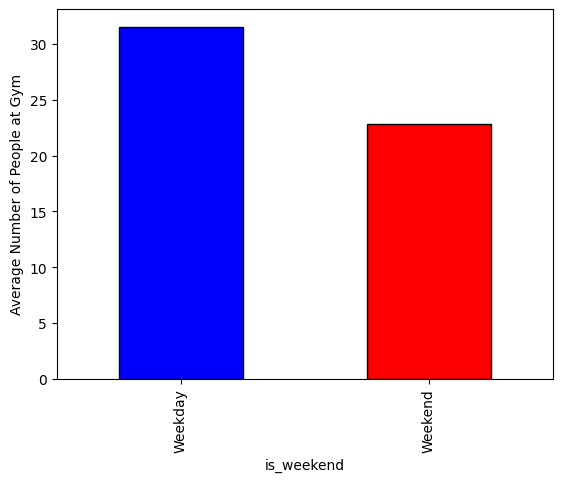

In [ ]:
pvalue, z_test = ztest((df[df['is_weekend'] == 1]['number_people']).to_numpy(), (df[df['is_weekend'] == 0]['number_people']).to_numpy()) # numpy due to z_test failing on scipy
print(pvalue)

df.groupby('is_weekend')['number_people'].mean().plot(kind='bar',
                                                      color=['blue', 'red'],
                                                      edgecolor='black')
plt.ylabel('Average Number of People at Gym')
plt.xticks([0, 1], ['Weekday', 'Weekend'])

**Conclusion #1**

From this experiment, because the P-Value obtained from the Z-Test is less than 0.05, we must reject the Null Hypothesis and conclude that Gyms *ARE* more crowded during the weekends.

**Experiment #2**

For this next experiment, we wanted to determine how the temperature of the day impacts gym attendance. We utilized a Z-Test again and visualized the most popular temperment to work out in.

According to an research article, 50°F is the median temperature that seperates being too hot to go to a gym and too cold by measuring comfortablitiy levels within each activity (Weight Lifting, Cardio, Aerobics, etc.)

*Chongyun Huang, Jiaxin Que, Qianni Liu, Yufeng Zhang,
On the gym air temperature supporting exercise and comfort,
Building and Environment,
Volume 206,
2021,
108313,
ISSN 0360-1323,
https://doi.org/10.1016/j.buildenv.2021.108313.*

*H0*: Temperature has no impact on gym crowdiness

*HA*: Cold outdoor Temperatures impact how crowded a gym is

-67.05555044201817


Text(0, 0.5, 'Number of People')

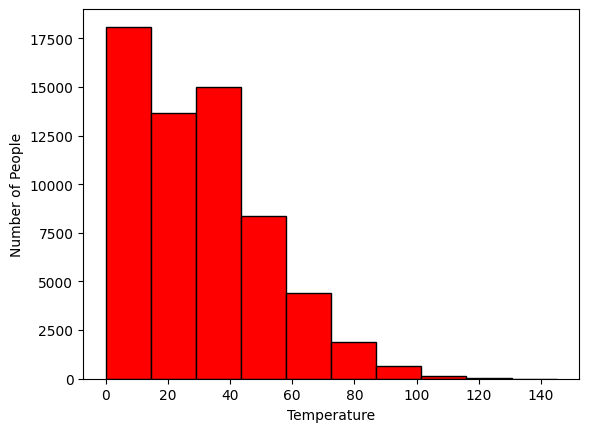

In [ ]:
pvalue, z_test = ztest((df[df['temperature'] < 50]['number_people']).to_numpy(), (df[df['temperature'] >= 50]['number_people']).to_numpy())
print(pvalue)
plt.hist(df['number_people'],color='red', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Number of People')


**Conclusion #2**

From this experiment using the z test once again, we must reject the Null Hypothesis and conclude that Cold Temperatures do indeed impact gym crowdiness and more people are present in the gym during cooler temperatures.

**Experiment #3**

For this experiment, we extrapolated the correlation of time of day and the amount of people at the gym by undergoing a Pearson Correlation Test. We then visualize the average amount of people that were at the gym during these varied times.

*H0*: There is no correlation with the time of day and the amount of people at the gym

*HA*: The time of day impacts the crowdiness of the gym

0.0


<Axes: xlabel='Time (Hour/24)', ylabel='Average Amount of People'>

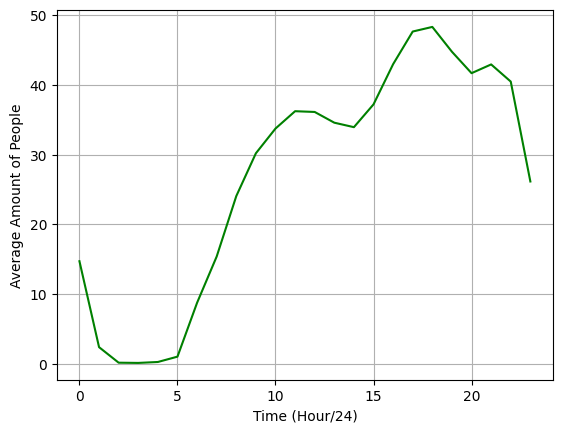

In [ ]:
cc_test = pearsonr(df['hour'], df['number_people'])
print(cc_test.pvalue)

df.groupby('hour')['number_people'].mean().plot(kind= 'line',
                                                color='green',
                                                grid= True,
                                                xlabel= 'Time (Hour/24)',
                                                ylabel= 'Average Amount of People')



**Conclusion #3**

From this experiment using the Pearson Correlation test, and a p-value of 0, we must reject the Null Hypothesis and conclude that the time of day does impact the amount of people in the gym.

**Experiment #4**

Within this last experiment, we wanted to see how Holidays affect gym attendance. Using a Chi Squared Test, we will compare the magnitude of attendance within a gym during Holidays and regular days.

*H0*: The amount of people in the gym on Holidays and regular days are the same

*HA*: The amount of people in the gym on Holidays and regular days are different.


1.8822621894188776e-11


([<matplotlib.axis.XTick at 0x79831fb25660>,
 [Text(0, 0, 'Regular Day'), Text(1, 0, 'Holiday')])

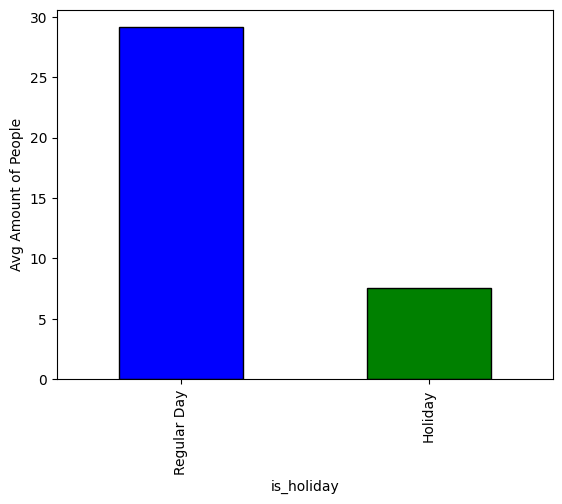

In [ ]:
obs = pd.crosstab(df['number_people'], df['is_holiday'])
print(sc.stats.chi2_contingency(obs).pvalue)

df.groupby('is_holiday')['number_people'].mean().plot(kind='bar',
                                                      ylabel= 'Avg Amount of People',
                                                      xlabel= '',
                                                      color=['blue', 'green'],
                                                      edgecolor='black')

plt.xticks(ticks=[0, 1], labels=['Regular Day', 'Holiday'])

**Conclusion #4**

From this experiment using the Chi Squared Test and getting a P-Value less than 0.05, we must reject the Null Hypothesis and conclude that the amount of people going differ on holidays and regular days.

**Data Exploratory Conclusion**

In terms of the dataset itself, there seems to be a large inclination of entries that visited the gym during 0-20 degrees. Now these may or may not be outliers depending on the reach at which the study was conducted on but, regardless, trends were still observable. Other than that the dataset includes 10 different factors or entries such as temperatures, weekday, etc. that impact the crowdiness of the gym. Due to the size of this dataset, the corrrelation and graphs presented in these experiments above illustrate unique trends and influences that further the goal and exploration of this project.


In conclusion many factors such as temperatures, day of the week, and time of day all impact the over crowdedness of gyms. Going forward, finding an optimal time that the least amount of people go to the gym will become more and more accurate as we conitnue tests such as the one above and narrow down our data.

# **Primary analysis**

---



We will be using Random Forest Regression to help us answer the question in the introduction. As we have seen in the previous data exploratory sections, the time of day, day of the week, as well as the temperature. We chose Random Forest, because of how complex the data is and the many conclusions they make on their own.

In [37]:
X = df[['timestamp', 'day_of_week', 'is_weekend', 'is_holiday', 'temperature', 'hour']]
y = df['number_people']

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = RandomForestRegressor(n_estimators=100, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 85.23682703972305


With a Mean Squared Error of 85%, the model was able to adapt and produce predictions closely to the data and adequately predict the amount of people given varying conditions.

We will not traverse through every predicted condition and their dedicated population to find the optimal time for the least amount of people in a 12 hour span.

In [44]:
conditions = [(12, day, weekend, holiday, temp, hour) # Iterating through every element and their values
                  for day in df['day_of_week'].unique()
                  for weekend in [0, 1]
                  for holiday in [0, 1]
                  for temp in df['temperature'].unique()
                  for hour in df['hour'].unique()]

print(conditions[np.argmin(model.predict(conditions))]) # Prediction Tuple of the most optimal time

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(12, 5, 1, 0, 47.69, 17)


From this we a provided that Non-Holiday Saturdays during cold temperatures around 5pm are optimal for having the least amount of people!

# Visualization
---

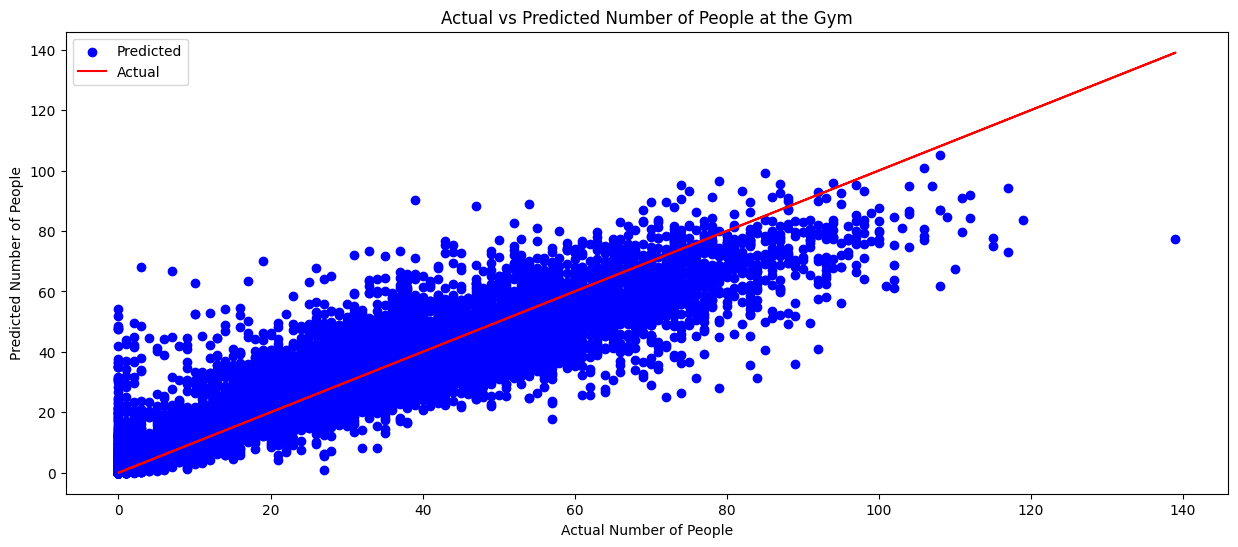

In [25]:
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Actual Number of People')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.ylabel('Predicted Number of People')
plt.title('Actual vs Predicted Number of People at the Gym')
plt.legend()
plt.show()

As we can see, through the various types and entries of data the model was able to learn and predict the amount of people at a gym given the conditions.

Now these predictions may have had a 85% as opposed to a more accurate percentage due to the volume of the entries and the variety of the data. As seen in the data exploration, there are trends or patterns for a given feature and the amount of people attending a gym and also their are many outliers. For example, this data may be sensitive to outliers in certain times such as New Years. During New Years, many people tend to join the gym with attendance pattenrs that may not adhere to the data. We beleive this and variety of human behavior is the source of these outliers.

# **Conclusions**

---



Throughout this whole project we have gave a step by step process on determining the best time to go to the gym given certain features. Individually we tried to see which features were the best in determining when is the best time to go to the gym.

First did a test is determining whether the weekday or the weekend, which was the best time to go to the gym. Through our testing we concluded that going to the gym in the weekday was the best since it had less people.

Second we try to see whether the weather had any impact on gym crowdiness. Using a Z-test we were able to conclude that weather does impact gym crowdiness and that worse weather tends to dictate that less people will be at the gym.

Then we tried to see whether the time of day had any impacts, and through pearson correlation test we realized that it does. We see that early mornings tend to have less people compared to after noon. We can assume this is because majority of individuals have to work in the morning times compared to afternoon.

Final hypothesis testing we did is to determine if holidays played any factor in people showing up to the gym. Using the Chi squared test we were able to conclude that it did and that on holidays the amount of people who go to the gym decrease compared to regular days.

Through all of our testing we can assume that Saturdays during cold weather and afternoon hours(5-7pm) on a non-holiday day were the best time to go to the gym due to the decrease in population.

We created a ML model of regression to predict these best times and the amount of people to show up to the gym based on this stipulations.

Throughout the whole process we were able to show the best times and features to utilize for optimal gym usage.